<a href="https://colab.research.google.com/github/AdrianDiaz99/Inteligencia-Artificial/blob/master/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
url = (
     "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
 )
adultos = pd.read_csv(url, header=None)

In [24]:
adultos.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salario-anual
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [22]:
adultos.columns = [
    "age",
    "workclass",
    "fnlwgt",
    "education",
    "education-num",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital-gain",
    "capital-loss",
    "hours-per-week",
    "native-country",
    "salario-anual"
    ]

In [26]:
adultos.drop("sex", axis=1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,salario-anual
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,0,0,20,United-States,<=50K


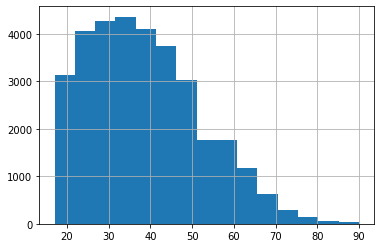

In [28]:
import matplotlib.pyplot as plt

adultos["age"].hist(bins=15)

plt.show()

In [29]:
correlation_matrix = adultos.corr()
correlation_matrix["age"]

age               1.000000
fnlwgt           -0.076646
education-num     0.036527
capital-gain      0.077674
capital-loss      0.057775
hours-per-week    0.068756
Name: age, dtype: float64

In [30]:
import numpy as np
a = np.array([2, 2])
b = np.array([4, 4])
np.linalg.norm(a - b)

2.8284271247461903

In [32]:
X = adultos.drop("age", axis=1)
X = X.values
y = adultos["age"]
y = y.values

In [33]:
new_data_point = np.array([
     0.569552,
     0.446407,
     0.154437,
     1.016849,
     0.439051,
     0.222526,
     0.291208,
 ])

In [44]:
X = adultos.drop(["age","workclass","education","marital-status", "occupation", 
                  "relationship", "race", "sex", "native-country", "salario-anual"], axis=1)
X = X.values
y = adultos["age"]
y = y.values

In [49]:
new_data_point = np.array([
    0.569552,
    0.446407,
    0.154437,
    1.016849,
    0.439051
])

In [50]:
distances = np.linalg.norm(X - new_data_point, axis=1)

In [51]:
k = 3
nearest_neighbor_ids = distances.argsort()[:k]
nearest_neighbor_ids

array([17096, 27207, 25743])

In [52]:
nearest_neighbor_rings = y[nearest_neighbor_ids]
nearest_neighbor_rings

array([25, 23, 46])

In [55]:
prediction = nearest_neighbor_rings.mean()
prediction

31.333333333333332